In [1]:
from sklearn.datasets import fetch_openml

it was loading it as a pandas data frame so to load it as a numpy array use as_frame = False

In [2]:
mnist = fetch_openml('mnist_784', as_frame = False)

C:\pythonnew\Lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
x, y = mnist['data'], mnist['target']

In [5]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
%matplotlib inline

In [10]:
import matplotlib
import matplotlib.pyplot as plt

Reshaping it so we can plot it

In [38]:
some_digits = x[36001]
some_digits_image = some_digits.reshape(28,28)
# reshaping it in 28 * 28 pixels

plt.imshow() , Display data as an image, i.e., on a 2D regular raster,creates an image from a 2-dimensional numpy array


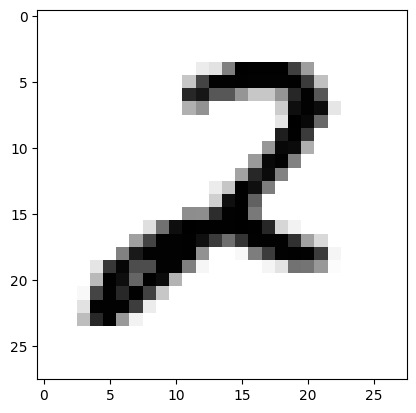

In [12]:
 plt.imshow(some_digits_image, cmap=matplotlib.cm.binary, interpolation="nearest")

(-0.5, 27.5, 27.5, -0.5)

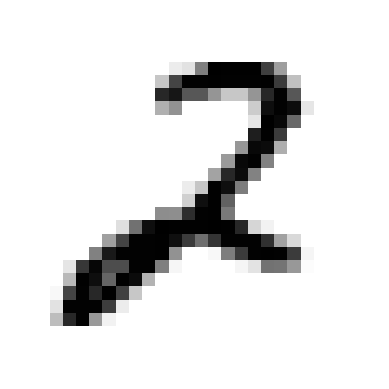

In [13]:
plt.imshow(some_digits_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [14]:
y[36001]

'2'

In [15]:
x_train , x_test = x[:60000], x[60000:]

In [16]:
y_train , y_test = y[:60000], y[60000:]

In [17]:
# shufffling it
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train , y_train = x_train[shuffle_index], y_train[shuffle_index]

# Creating a 2 Detector

In [25]:
# y is the target part and we are making it as a true or false type so when we test it gives the
# results into true or false form
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test == 2)
# it will return false if the values will be equal to 2

In [26]:
y_train_2

array([False, False, False, ..., False, False, False])

In [27]:
y_test_2

array([False,  True, False, ..., False, False, False])

In [28]:
from sklearn.linear_model import LogisticRegression

As you noted, tol is the tolerance for the stopping criteria. This tells scikit to stop searching for a minimum (or maximum) once some tolerance is achieved, i.e. once you're close enough

In [32]:
clf = LogisticRegression(tol = 0.1)

In [33]:
clf.fit(x_train, y_train_2)

C:\pythonnew\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
clf.predict([some_digits])

array([ True])

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x_train,y_train_2, cv = 3, scoring="accuracy")

C:\pythonnew\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\pythonnew\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

array([0.97915, 0.97675, 0.9782 ])

In [36]:
a = cross_val_score(clf, x_train,y_train_2, cv = 3, scoring="accuracy")

C:\pythonnew\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\pythonnew\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [37]:
a.mean()

0.9780333333333333

it is giving 97% accuracy